# Seaborn

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn lib add
import seaborn as sns

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [2]:
iris_dataset    = sns.load_dataset('iris')
titanic_dataset = sns.load_dataset('titanic')
tips_dataset = sns.load_dataset('tips')
flights_dataset = sns.load_dataset('flights')

### - barplot() : 범주형 데이터값에 따른 시각화(평균, 편차, 에러)
- 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

In [3]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


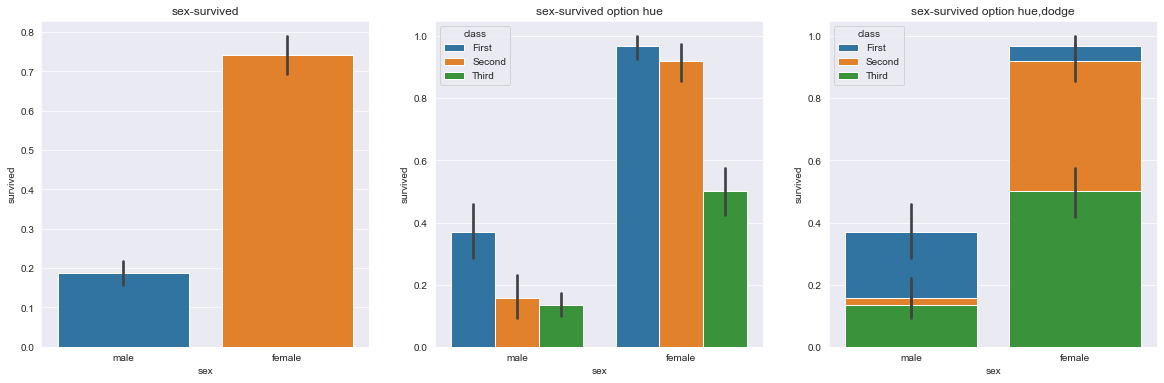

In [9]:
fig = plt.figure(figsize=(20,6)) # 서브플롯 만들때 변수로 받음

sns.set_style('darkgrid') # style 설정
area01=fig.add_subplot(1,3,1) # 1행 3열에서 첫번째
area01.set_title('sex-survived')
sns.barplot(data=titanic_dataset,x='sex',y='survived',ax=area01)

area02=fig.add_subplot(1,3,2)
area02.set_title('sex-survived option hue')
sns.barplot(ax=area02,data=titanic_dataset,x='sex',y='survived', hue='class') # 다중 막대그래프

area03=fig.add_subplot(1,3,3)
area03.set_title('sex-survived option hue,dodge')
sns.barplot(ax=area03,data=titanic_dataset,x='sex',y='survived', hue='class',dodge=False) # 누적 막대그래프
plt.show()
plt.close()

In [10]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:title={'center':'요일별 매출'}, xlabel='day', ylabel='total_bill'>

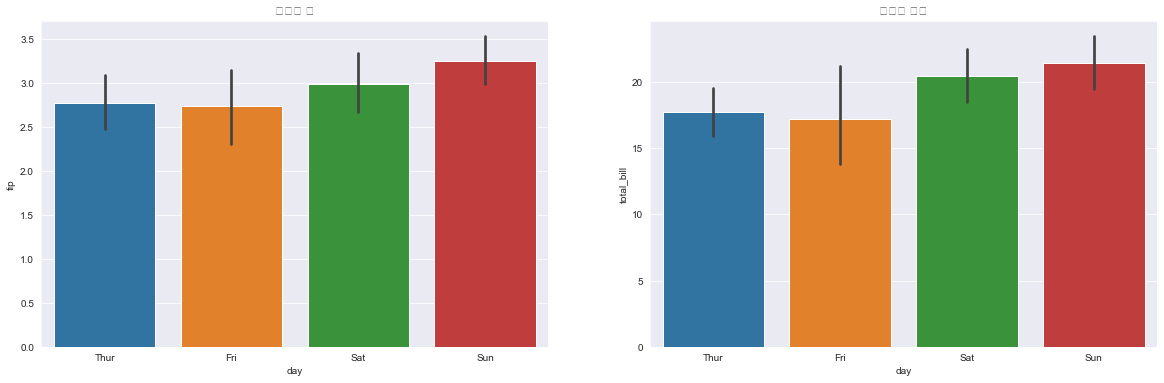

In [15]:
# 요일별 전체 팁과 요일별 매출을 시각화한다면?
fig=plt.figure(figsize=(20,6))
ax01=fig.add_subplot(1,2,1)
ax01.set_title('요일별 팁')
sns.barplot(data=tips_dataset,x='day',y='tip',ax=ax01)

ax02=fig.add_subplot(1,2,2)
ax02.set_title('요일별 매출')
sns.barplot(data=tips_dataset,x='day',y='total_bill',ax=ax02)

### - countplot():빈도를 표시하는 함수 
- 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

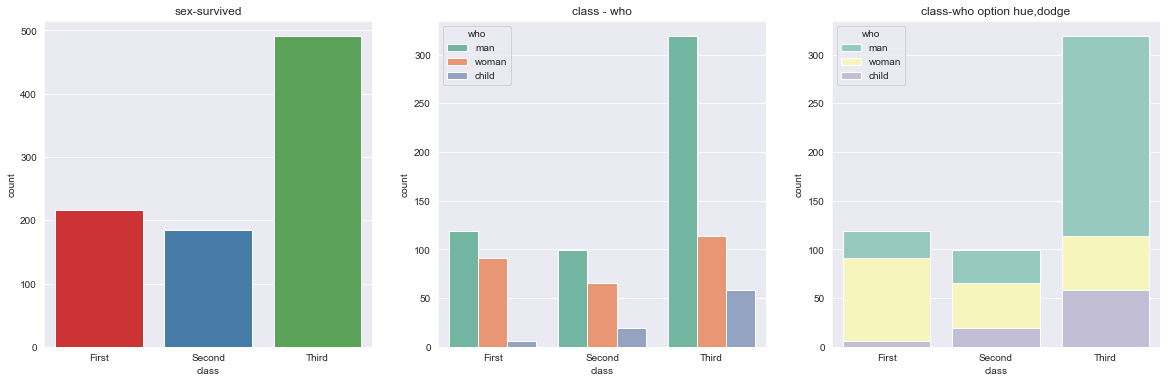

In [25]:
fig = plt.figure(figsize=(20,6)) # 서브플롯 만들때 변수로 받음

sns.set_style('darkgrid') # style 설정
area01=fig.add_subplot(1,3,1) # 1행 3열에서 첫번째
area01.set_title('sex-survived')
sns.countplot(data=titanic_dataset,x='class',ax=area01,palette='Set1')

area02=fig.add_subplot(1,3,2)
area02.set_title('class - who')
sns.countplot(ax=area02,data=titanic_dataset,x='class', hue='who',palette='Set2') # hue='그룹의 기준', palette = 색의 테마 지정해줌

area03=fig.add_subplot(1,3,3)
area03.set_title('class-who option hue,dodge')
sns.countplot(ax=area03,data=titanic_dataset,x='class', hue='who',dodge=False,palette='Set3') # 누적 막대그래프
plt.show()
plt.close()

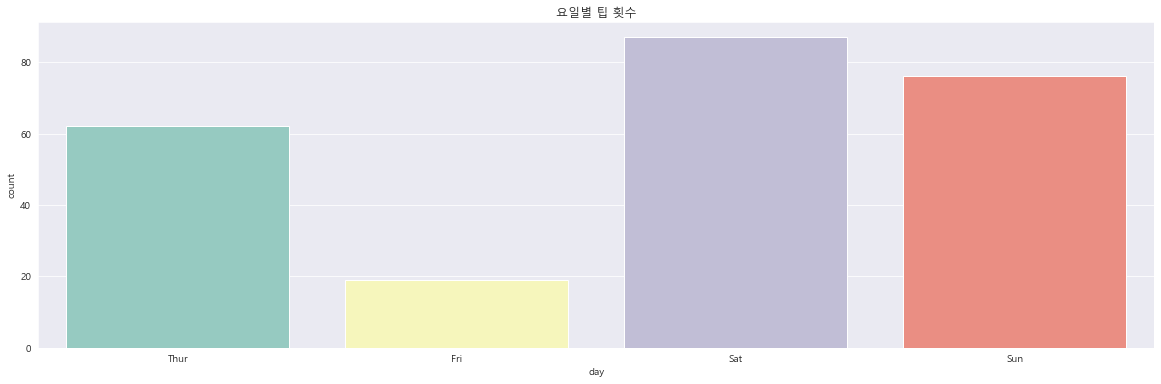

In [34]:
# 요일별로 팁을 준 빈도를 시각화 한다면?(막대그래프)

# 한글 깨짐문제 해결
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize=(20,6))
sns.countplot(data=tips_dataset,x='day',palette='Set3')
plt.title('요일별 팁 횟수')

plt.show()
plt.close()

### - stipplot() : 모든 데이터를 점으로 시각화
- 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다. 
- jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 한다.

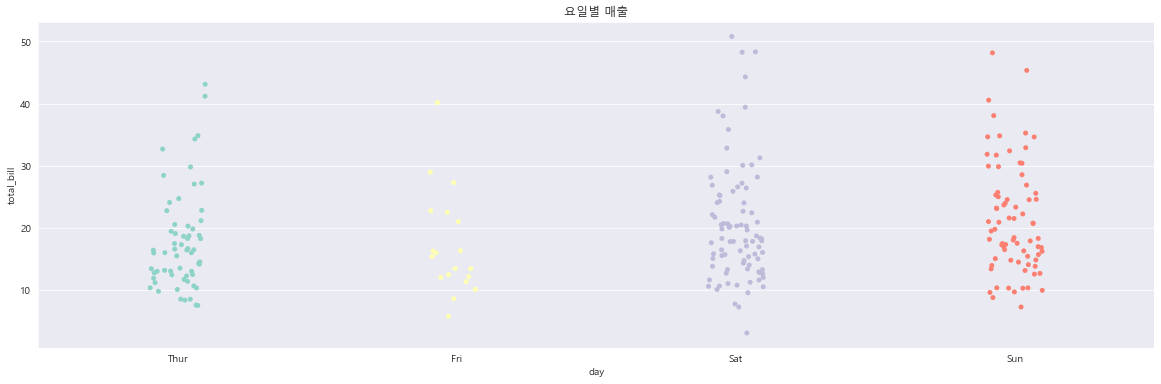

In [35]:
# 요일별로 매출을 시각화 한다면?
plt.figure(figsize=(20,6))
sns.stripplot(data=tips_dataset,x='day',y='total_bill',palette='Set3', jitter=True)
plt.title('요일별 매출')

plt.show()
plt.close()

### - swarmplot()
- stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.

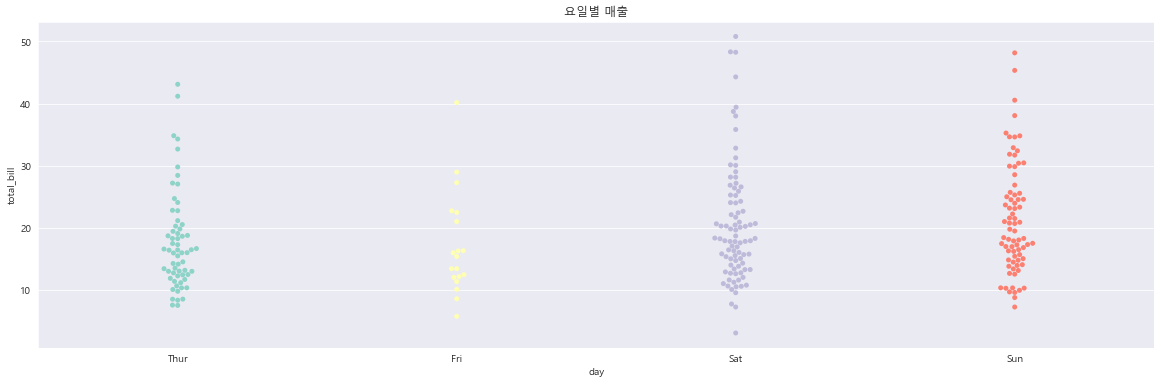

In [40]:
plt.figure(figsize=(20,6))
sns.swarmplot(data=tips_dataset,x='day',y='total_bill',palette='Set3')
plt.title('요일별 매출')

plt.show()
plt.close()

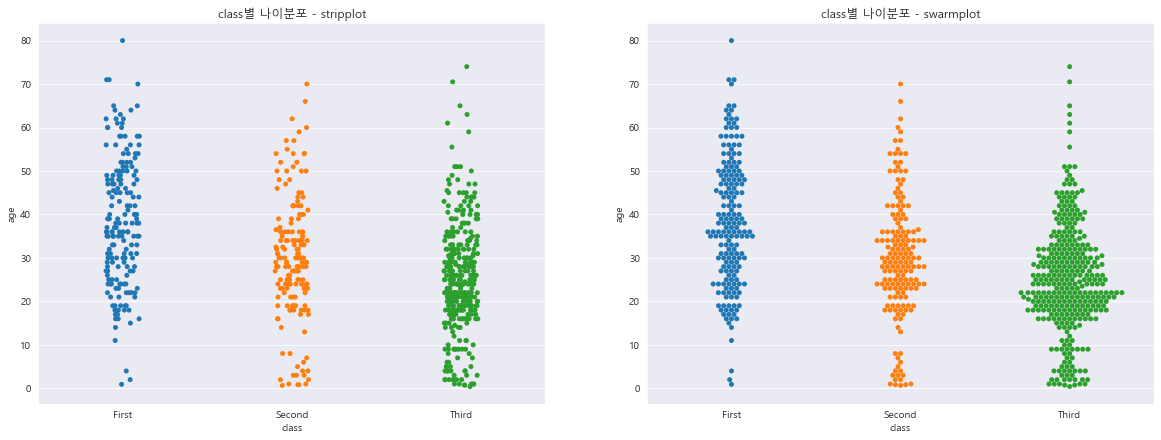

In [47]:
# 타이타닉을 이용해서 서브플롯으로 2개의 영역을 만들고,
# class별 나이분포를 확인하는 시각화 - stripplot, swarmplot 차이 확인
fig=plt.figure(figsize=(20,7))

ax01=fig.add_subplot(1,2,1)
ax01.set_title('class별 나이분포 - stripplot')
sns.stripplot(data=titanic_dataset,x='class',y='age',ax=ax01,jitter=True)

ax02=fig.add_subplot(1,2,2)
ax02.set_title('class별 나이분포 - swarmplot')
sns.swarmplot(data=titanic_dataset,x='class',y='age',ax=ax02) # swarmplot은 jitter 불가능


plt.show()
plt.close()

In [46]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


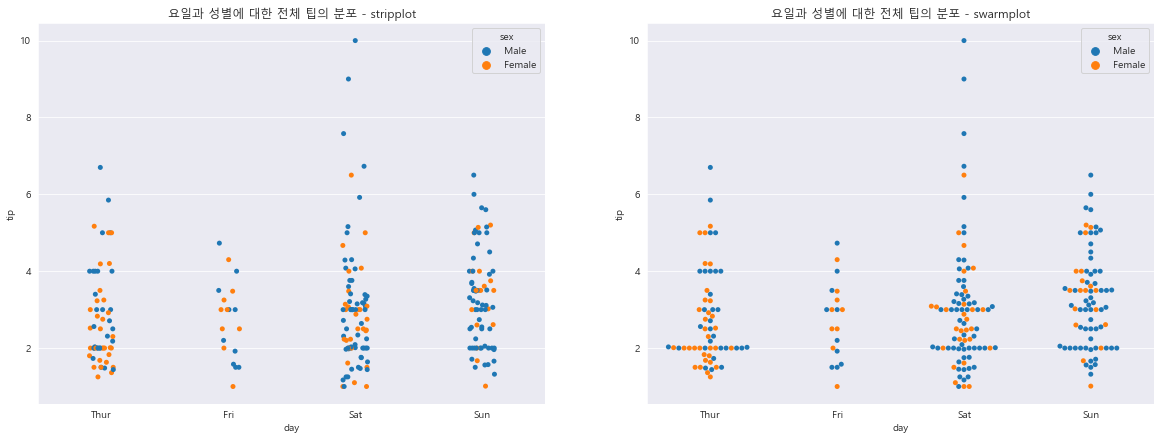

In [48]:
# tips_dataset을 이용해서 서블플롯으로 2개의 영역을 만들고,
# 요일과 성별에 대한 전체 팁의 분포를 확인하는 시각화 - stripplot, swarmplot
fig=plt.figure(figsize=(20,7))

ax01=fig.add_subplot(1,2,1)
ax01.set_title('요일과 성별에 대한 전체 팁의 분포 - stripplot')
sns.stripplot(data=tips_dataset,x='day',y='tip',hue='sex',ax=ax01,jitter=True)

ax02=fig.add_subplot(1,2,2)
ax02.set_title('요일과 성별에 대한 전체 팁의 분포 - swarmplot')
sns.swarmplot(data=tips_dataset,x='day',y='tip',hue='sex',ax=ax02) # swarmplot은 jitter 불가능


plt.show()
plt.close()

### - boxplot()
- 중앙값, 표준 편차 등, 분포를 나타내준다.

### - violinplot()
- 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.

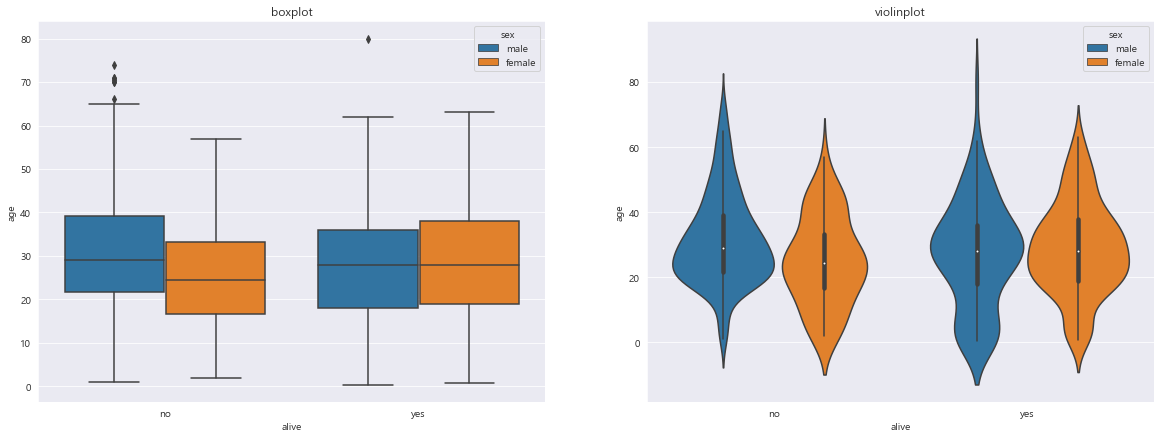

In [53]:

fig=plt.figure(figsize=(20,7))

ax01=fig.add_subplot(1,2,1)
ax01.set_title('boxplot')
sns.boxplot(data=titanic_dataset,x='alive',y='age',hue='sex',ax=ax01)

ax02=fig.add_subplot(1,2,2)
ax02.set_title('violinplot')
sns.violinplot(data=titanic_dataset,x='alive',y='age',hue='sex',ax=ax02) 


plt.show()
plt.close()

### - heatmap
- 열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로, 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽으로 출력하는 것이 특징이다. 

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

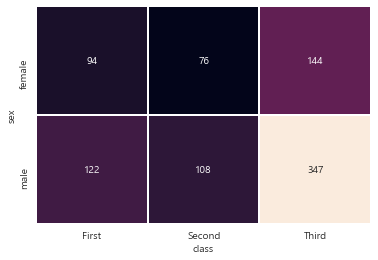

In [61]:
table=titanic_dataset.pivot_table(index='sex',columns='class',aggfunc='size')
display(table)
sns.heatmap(table,
           annot=True, 
           fmt='d',  # fmt='d' 데이터를 정수형으로 표현
           linewidth=1, # 사이사이 넓이만큼 띄어 주기
           cbar=False) # cbar=False 옆부분에 color bar 없애기

In [62]:
flights_dataset.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

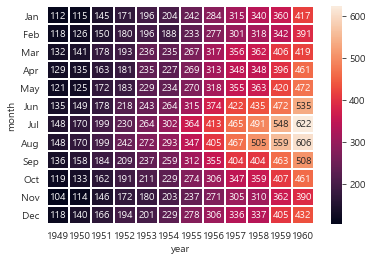

In [70]:
# 연도에 월별 승객수에 대한 히트맵 시각화를 한다면?
table2=flights_dataset.pivot('month','year','passengers')
display(table2)
sns.heatmap(table2,
           annot=True, 
           fmt='d',  # fmt='d' 데이터를 정수형으로 표현
           linewidth=1)# 사이사이 넓이만큼 띄어 주기


### pairplot() : 상관관계를 시각화하기 위한 함수
- 상관분석 -> 두 확률변수간의 관계를 파악하는 방법
- 상관계수 -> 관련성의 정도
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.

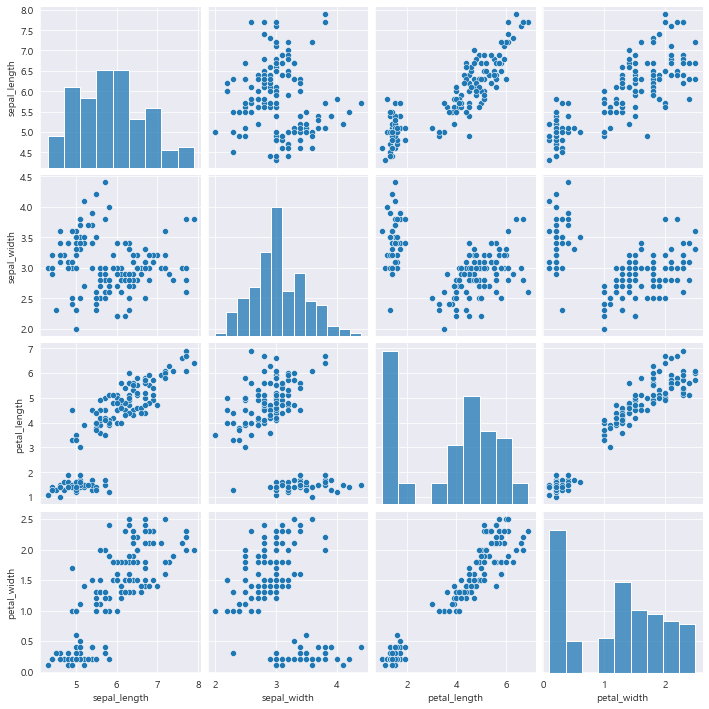

In [71]:
sns.pairplot(iris_dataset)
plt.show()
plt.close()

### - folium

In [74]:
import folium as g

In [77]:
map=g.Map(location=[37.5532036880752,126.98739716743572],zoom_start=12)
map
# save할때
# .save('파일경로.html')

In [78]:
map=g.Map(location=[37.5532036880752,126.98739716743572],
          zoom_start=12,
         tiles='Stamen Terrain')  # tiles= 지도 스타일 지정
map

In [79]:
map=g.Map(location=[37.5532036880752,126.98739716743572],
          zoom_start=12,
         tiles='Stamen Toner') # tiles= 지도 스타일 지정
map

### - 서울지역 대학교 위치.xlsx 데이터를 활용해서 지도에 표시

In [98]:
location_frm=pd.read_excel('C:/Users/whgud/data/서울지역 대학교 위치.xlsx')
location_frm.rename(columns={'Unnamed: 0':'대학교'},inplace=True)
display(location_frm.head())
location_frm.set_index('대학교',inplace=True)

display(location_frm.head())

,대학교,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610


,위도,경도
대학교,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [94]:
display(location_frm.head())

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [82]:
map=g.Map(location=[37.5532036880752,126.98739716743572],
          zoom_start=12,
         tiles='Stamen Terrain')

In [89]:
print('대학교의 위치정보를 Marker로 표시!')

for name, lat, lng in zip(location_frm.index,location_frm.위도,location_frm.경도):
    #print(name,lat,lng)
    g.Marker([lat,lng],popup=name,icon=g.Icon(color='red')).add_to(map)
    
map

대학교의 위치정보를 Marker로 표시!


In [101]:
print('대학교의 위치정보를 CircleMarker로 표시!')

for name, lat, lng in zip(location_frm.index,location_frm.위도,location_frm.경도):
    #print(name,lat,lng)
    g.CircleMarker([lat,lng],
                   popup=name,
                   icon=g.Icon(color='blue'),
                   fill=True,
                   fill_color='black',
                  fill_opacity=.5,
                  radius=10).add_to(map)
    
map

대학교의 위치정보를 CircleMarker로 표시!


In [123]:
school_frm=pd.read_excel('C:/Users/whgud/data/elem_school_folium.xlsx')
school_frm.head()

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000001838,서울휘경초등학교,초등학교,1959-10-10,공립,본교,운영,서울특별시 동대문구 휘경동 302-2,서울특별시 동대문구 망우로6길 48,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.585736,127.058122,2019-09-16,7001220,한국교원대학교
1,B000001839,서울동답초등학교,초등학교,1984-05-23,공립,본교,운영,서울특별시 동대문구 답십리동 2-24,서울특별시 동대문구 답십리로60길 12,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.571817,127.064205,2019-09-16,7001220,한국교원대학교
2,B000001840,서울답십리초등학교,초등학교,1962-11-29,공립,본교,운영,서울특별시 동대문구 답십리동 274,서울특별시 동대문구 전농로3길 23,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.569003,127.055423,2019-09-16,7001220,한국교원대학교
3,B000001841,서울신답초등학교,초등학교,1972-05-09,공립,본교,운영,서울특별시 동대문구 답십리동 463-13,서울특별시 동대문구 천호대로 177,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.573001,127.043399,2019-09-16,7001220,한국교원대학교
4,B000001842,서울용두초등학교,초등학교,1948-11-01,공립,본교,운영,서울특별시 동대문구 용두동 237-1,서울특별시 동대문구 천호대로13길 43,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.575743,127.028885,2019-09-16,7001220,한국교원대학교


In [124]:
# Feature Selection - 필요한 칼럼(feature)만 가져오는 것
# 학교명, 학교급구분,소재지도로명주소, 위도, 경도만 가져오기

subset_frm=school_frm[['학교명','학교급구분','소재지도로명주소','위도','경도']]
subset_frm.head()

,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885


In [125]:
# 소재지도로명주소에 서울이 포함되고, 학교급구분이 초등학교만 추출한다면?
# str.contains() 사용할 때
subset_frm[(subset_frm['소재지도로명주소'].str.contains('서울'))&(subset_frm['학교급구분']=='초등학교')]


,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11684,서울위례별초등학교,초등학교,서울특별시 송파구 위례광장로 243,37.479086,127.145042
11702,서울하늘숲초등학교,초등학교,서울특별시 구로구 오리로 1106,37.484688,126.842417
11731,서울언남초등학교,초등학교,서울특별시 서초구 헌릉로8길 42,37.453919,127.061343
11772,서울항동초등학교,초등학교,서울특별시 구로구 연동로 178,37.476731,126.823983


In [128]:
#query() 사용할때
print("결측값 확인",subset_frm.isnull().sum())
print("결측값 제거")
subset_frm.dropna(inplace=True)
print("결측값 확인",subset_frm.isnull().sum())
condition="학교급구분=='초등학교' and 소재지도로명주소.str.contains('서울').values"
filter_frm=subset_frm.query(condition)

결측값 확인 학교명         0
학교급구분       0
소재지도로명주소    0
위도          0
경도          0
dtype: int64
결측값 제거
결측값 확인 학교명         0
학교급구분       0
소재지도로명주소    0
위도          0
경도          0
dtype: int64


In [130]:
seoul_school_map=g.Map(location=[37.5532036880752,126.98739716743572], # 서울시청
          zoom_start=12,
         tiles='Stamen Terrain')

for idx in filter_frm.index:
    g.Marker([filter_frm.loc[idx,'위도'],filter_frm.loc[idx,'경도']],
            popup=filter_frm.loc[idx,'학교명']).add_to(seoul_school_map)
seoul_school_map

### Choropleth
- 색상이나 패턴을 사용하여 특정 통계에 대한 데이터를 사전 정의된 영역과 관련시켜 시각화 한 지도 유형이다. 

- 이러한 지도 시각화는 점 데이터로 표현된 정보 보다는, 특정 구역에 대한 통계 데이터를 시각화 하는 데에 적절하다. 

- 주의할 점 : 컬럼명 매칭!!!!

    - geometry 데이터와 속성정보가 있는 데이터에서 지역을 나타내는 컬럼명이 일치해야한다. (그래야 색이 칠해진다) 

In [155]:
# 경기도인구데이터.xlsx 와 경기도행정구역경계.json 파일을 활용한 분석

pop_frm=pd.read_excel('C:/Users/whgud/data/경기도인구데이터.xlsx')
pop_frm.set_index('구분',inplace=True)
pop_frm.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [156]:
geo_data=json.load(open('C:/Users/whgud/data/경기도행정구역경계.json', encoding='UTF-8'))
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [157]:
pop_frm.columns=pop_frm.columns.map(str) # 숫자면 안되서 문자로 만들어줌
pop_frm.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [158]:
gyeonggi_map=g.Map(location=[37.26348953527056, 127.02860641932708], # 수원시청
          zoom_start=12,
         tiles='Stamen Terrain')

# 구분된 경계선을 표시하는 객체
g.Choropleth(geo_data=geo_data,
             data=pop_frm['2017'],
             columns=[pop_frm.index, pop_frm['2017']],
            key_on='feature.properties.name').add_to(gyeonggi_map)
gyeonggi_map

In [33]:
# 폰트확인
import matplotlib.font_manager as fonm

font_list = [font.name for font in fonm.fontManager.ttflist]

for f in font_list:

    print(f"{f}.ttf")

DejaVu Sans Mono.ttf
STIXGeneral.ttf
DejaVu Sans.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
STIXNonUnicode.ttf
cmb10.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
STIXNonUnicode.ttf
cmex10.ttf
STIXSizeThreeSym.ttf
STIXSizeFiveSym.ttf
cmtt10.ttf
DejaVu Serif.ttf
DejaVu Sans Display.ttf
cmss10.ttf
STIXSizeThreeSym.ttf
DejaVu Sans Mono.ttf
STIXSizeTwoSym.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
DejaVu Sans Mono.ttf
DejaVu Serif.ttf
DejaVu Sans Mono.ttf
STIXSizeFourSym.ttf
DejaVu Sans.ttf
cmmi10.ttf
STIXNonUnicode.ttf
STIXGeneral.ttf
STIXNonUnicode.ttf
STIXSizeOneSym.ttf
STIXSizeOneSym.ttf
STIXSizeTwoSym.ttf
cmsy10.ttf
DejaVu Serif Display.ttf
cmr10.ttf
STIXSizeFourSym.ttf
Arial.ttf
Harrington.ttf
HYbsrB.ttf
Microsoft New Tai Lue.ttf
Perpetua.ttf
Leelawadee UI.ttf
Chiller.ttf
HYgprM.ttf
DomCasual BT.ttf
Corbel.ttf
HYnamM.ttf
MS Outlook.ttf
Han Santteut Dotum.ttf
????.ttf
Gulim.ttf
Ravie.ttf
HYmprL.ttf
Ebrima.ttf
Han Santteut Dotum.ttf
Bodoni MT.ttf
Californian FB.ttf
Franklin Gothic Demi.ttf
Malgun Gothic.ttf